### Keras Examples
   #### Dense Model 

In [1]:
'''Trains a simple Linear Regressin on a simulated data
'''

from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD 


batch_size = 10
epochs = 20

def SimulData():
	# Simulate some data for training 
	x_train = np.arange(0,10, 0.25 ) 
	x_train = x_train + 1.0/3.0 * np.random.randn(x_train.size);
	y_train  = np.cos( x_train  * np.pi /7) +  0.1 * np.random.randn(x_train.size);

	x_test = np.arange(0,10, 0.5 ) 
	x_test = x_test + 1.0/3.0 * np.random.randn(x_test.size);
	y_test  = np.cos( x_test  * np.pi /7)+  0.1 * np.random.randn(x_test.size) 

	return (x_train,y_train) , (x_test, y_test)


# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = SimulData(); 

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



40 train samples
20 test samples


In [2]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


model.compile(loss='mse',
              optimizer=sgd,
              metrics=['mse'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
4/4 [==============================] - 0s 76ms/step - loss: 24.1527 - mse: 24.1527 - val_loss: 0.3720 - val_mse: 0.3720
Epoch 2/20
4/4 [==============================] - 0s 25ms/step - loss: 0.4913 - mse: 0.4913 - val_loss: 0.2919 - val_mse: 0.2919
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 0.2960 - mse: 0.2960 - val_loss: 0.2659 - val_mse: 0.2659
Epoch 4/20
4/4 [==============================] - 0s 9ms/step - loss: 0.3219 - mse: 0.3219 - val_loss: 0.1953 - val_mse: 0.1953
Epoch 5/20
4/4 [==============================] - 0s 9ms/step - loss: 0.3610 - mse: 0.3610 - val_loss: 0.1713 - val_mse: 0.1713
Epoch 6/20
4

Test loss: 0.38523024320602417


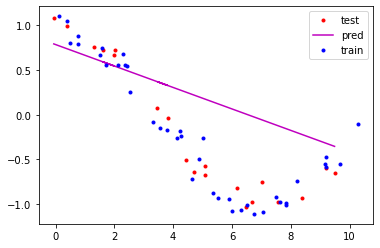

In [3]:
y_pred = model.predict(x_test); 


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

tst = plt.plot(x_test, y_test,'r.',label='test'); 

pred = plt.plot(x_test, y_pred,'m',label='pred');

tr = plt.plot(x_train, y_train,'b.',label='train');

plt.legend()
plt.show()

##### Logistic Regression 
This part load the MNIST data and trains a simple logistic 
regression classifier


In [4]:
'''Keras MNIST MLP Example 
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_shape=(784,)))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6013 - accuracy: 0.8500 - val_loss: 0.3429 - val_accuracy: 0.9084
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.9083 - val_loss: 0.2991 - val_accuracy: 0.9181
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.9153 - val_loss: 0.2858 - val_accuracy: 0.9198
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.9197 - val_loss: 0.2782 - val_accuracy: 0.9222
Epoch 5/10
469/469 [===================

#### TODO
1. train a 2/3 layer network 
2. Find the following hyperparameters on a validation data
    - number of neurons in a layer
    - effect of drop out
    
3. Plot the learning curves of these models
    - both training and validation learning curve
    
    

In [33]:
model1 = Sequential()

model1.add(Dense(50, activation='relu', input_shape=(784,)))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_443 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_444 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_445 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_446 (Dense)            (None, 10)                110       
Total params: 40,590
Trainable params: 40,590
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6214 - accuracy: 0.8147 - val_loss: 0.2614 - val_accuracy: 0.9271
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2298 - accuracy: 0.9348 - va

In [19]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


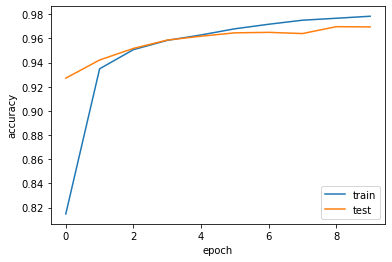

In [34]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

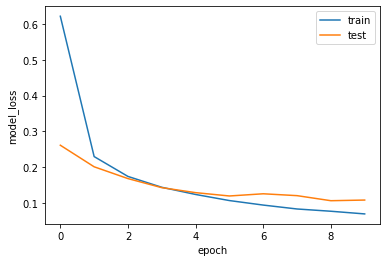

In [35]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model_loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')
plt.show()


In [31]:
model11 = Sequential()

model11.add(Dense(50, activation='relu', input_shape=(784,)))
model11.add(Dropout(0.25))
model11.add(Dense(20, activation='relu'))
model11.add(Dropout(0.25))
model11.add(Dense(num_classes, activation='relu'))
model11.add(Dropout(0.25))
model11.add(Dense(num_classes, activation='softmax'))

model11.summary()

model11.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history11 = model11.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score11 = model11.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])

Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_439 (Dense)            (None, 50)                39250     
_________________________________________________________________
dropout_55 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_440 (Dense)            (None, 20)                1020      
_________________________________________________________________
dropout_56 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_441 (Dense)            (None, 10)                210       
_________________________________________________________________
dropout_57 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_442 (Dense)            (None, 10)             

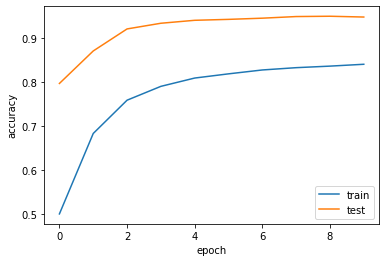

In [32]:
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()
